In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import dtale as dt
import numpy as np
import re
from sklearn import linear_model
import seaborn as sns

In [190]:
%matplotlib inline

In [191]:
pd.set_option('display.max_columns', None)

In [192]:
smile = pd.read_csv('../data/smile_new.csv', usecols=[6, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 112, 113, 125, 127, 129, 130, 144, 145, 146, 149])

In [193]:
smile

,CallerNum,Oral Care Encounter - 1351 - Quantity,Oral Care Encounter - 1354 - Quantity,Oral Care Encounter - 2140 - Quantity,Oral Care Encounter - 2150 - Quantity,Oral Care Encounter - 2160 - Quantity,Oral Care Encounter - 2161 - Quantity,Oral Care Encounter - 220 - Quantity,Oral Care Encounter - 230 - Quantity,Oral Care Encounter - 2330 - Quantity,Oral Care Encounter - 2331 - Quantity,Oral Care Encounter - 2332 - Quantity,Oral Care Encounter - 2335 - Quantity,Oral Care Encounter - 2390 - Quantity,Oral Care Encounter - 2391 - Quantity,Oral Care Encounter - 2392 - Quantity,Oral Care Encounter - 2393 - Quantity,Oral Care Encounter - 2394 - Quantity,Oral Care Encounter - 2915 - Quantity,Oral Care Encounter - 2920 - Quantity,Oral Care Encounter - 2933 - Quantity,Oral Care Encounter - 2940 - Quantity,Oral Care Encounter - 2950 - Quantity,Oral Care Encounter - 2954 - Quantity,Oral Care Encounter - 2955 - Quantity,Oral Care Encounter - 2980 - Quantity,Oral Care Encounter - 3220 - Quantity,Oral Care Encounter - 4341 - Quantity,Oral Care Encounter - 4342 - Quantity,Oral Care Encounter - 6930 - Quantity,Oral Care Encounter - 6980 - Quantity,Oral Care Encounter - 7111 - Quantity,Oral Care Encounter - 7140 - Quantity,Oral Care Encounter - 7210 - Quantity,Oral Care Encounter - 7220 - Quantity,Oral Care Encounter - 7230 - Quantity,Oral Care Encounter - 7240 - Quantity,Oral Care Encounter - 7241 - Quantity,Oral Care Encounter - 7250 - Quantity,Oral Care Encounter - 7261 - Quantity,Oral Care Encounter - 7285 - Quantity,Oral Care Encounter - 7286 - Quantity,Oral Care Encounter - 7310 - Quantity,Oral Care Encounter - 7311 - Quantity,Oral Care Encounter - 7320 - Quantity,Oral Care Encounter - 7321 - Quantity,Oral Care Encounter - 7410 - Quantity,Oral Care Encounter - 7411 - Quantity,Oral Care Encounter - 7412 - Quantity,Oral Care Encounter - 7413 - Quantity,Oral Care Encounter - 7414 - Quantity,Oral Care Encounter - 7415 - Quantity,Oral Care Encounter - 7440 - Quantity,Oral Care Encounter - 7450 - Quantity,Oral Care Encounter - 7451 - Quantity,Oral Care Encounter - 7460 - Quantity,Oral Care Encounter - 7461 - Quantity,Oral Care Encounter - 7471 - Quantity,Oral Care Encounter - 7510 - Quantity,Oral Care Encounter - 7511 - Quantity,Oral Care Encounter - 7970 - Mandibular Quantity,Oral Care Encounter - 7970 - Maxillary Quantity,Oral Care Encounter - 7971 - Quantity,Oral Care Encounter - 7972 - Quantity,Oral Care Encounter - 9110 - Quantity,Oral Care Encounter - 9951 - Quantity,Oral Care Encounter - Lab Assist narrative,Oral Care Encounter - No Code - Denture Step Mandibular Quantity,Oral Care Encounter - No Code - Denture Step Maxillary Quantity,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,"Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - What is the next step for clients encounter?,Screening - # of Lower Natural Teeth,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Age
0,3638169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [194]:
smile_dummies = pd.get_dummies(smile, prefix=['condition_'], columns=['Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?'])

In [195]:
smile_corr = smile_dummies[['CallerNum', 'Age', 'condition__Dont know', 'condition__Fair', 'condition__Good', 'condition__Poor', 'condition__Very Good']]

In [196]:
smile_corr.corr()

,CallerNum,Age,condition__Dont know,condition__Fair,condition__Good,condition__Poor,condition__Very Good
CallerNum,1.000000,-0.078295,0.002094,-0.020510,-0.060727,0.086355,-0.022755
Age,-0.078295,1.000000,-0.002807,0.016926,0.019198,-0.032418,0.011934
condition__Dont know,0.002094,-0.002807,1.000000,-0.117073,-0.067500,-0.156485,-0.023937
condition__Fair,-0.020510,0.016926,-0.117073,1.000000,-0.222094,-0.514880,-0.078761
condition__Good,-0.060727,0.019198,-0.067500,-0.222094,1.000000,-0.296860,-0.045410
condition__Poor,0.086355,-0.032418,-0.156485,-0.514880,-0.296860,1.000000,-0.105275
condition__Very Good,-0.022755,0.011934,-0.023937,-0.078761,-0.045410,-0.105275,1.000000


In [197]:
smile.groupby('CallerNum')['Screening - Last Screening Date'].value_counts().sort_values(ascending=False)

CallerNum  Screening - Last Screening Date
-1         9/26/2019                          37
 2441776   9/25/2018                          36
 2710403   5/3/2019                           29
 2860770   5/28/2019                          28
 2466431   10/16/2018                         24
                                              ..
 2858696   10/21/2020                          1
           6/2/2021                            1
 2859250   8/26/2019                           1
 2859426   4/29/2019                           1
 4573002   9/29/2021                           1
Name: Screening - Last Screening Date, Length: 5895, dtype: int64

In [198]:
smile.loc[smile['CallerNum'] == 2441776]

,CallerNum,Oral Care Encounter - 1351 - Quantity,Oral Care Encounter - 1354 - Quantity,Oral Care Encounter - 2140 - Quantity,Oral Care Encounter - 2150 - Quantity,Oral Care Encounter - 2160 - Quantity,Oral Care Encounter - 2161 - Quantity,Oral Care Encounter - 220 - Quantity,Oral Care Encounter - 230 - Quantity,Oral Care Encounter - 2330 - Quantity,Oral Care Encounter - 2331 - Quantity,Oral Care Encounter - 2332 - Quantity,Oral Care Encounter - 2335 - Quantity,Oral Care Encounter - 2390 - Quantity,Oral Care Encounter - 2391 - Quantity,Oral Care Encounter - 2392 - Quantity,Oral Care Encounter - 2393 - Quantity,Oral Care Encounter - 2394 - Quantity,Oral Care Encounter - 2915 - Quantity,Oral Care Encounter - 2920 - Quantity,Oral Care Encounter - 2933 - Quantity,Oral Care Encounter - 2940 - Quantity,Oral Care Encounter - 2950 - Quantity,Oral Care Encounter - 2954 - Quantity,Oral Care Encounter - 2955 - Quantity,Oral Care Encounter - 2980 - Quantity,Oral Care Encounter - 3220 - Quantity,Oral Care Encounter - 4341 - Quantity,Oral Care Encounter - 4342 - Quantity,Oral Care Encounter - 6930 - Quantity,Oral Care Encounter - 6980 - Quantity,Oral Care Encounter - 7111 - Quantity,Oral Care Encounter - 7140 - Quantity,Oral Care Encounter - 7210 - Quantity,Oral Care Encounter - 7220 - Quantity,Oral Care Encounter - 7230 - Quantity,Oral Care Encounter - 7240 - Quantity,Oral Care Encounter - 7241 - Quantity,Oral Care Encounter - 7250 - Quantity,Oral Care Encounter - 7261 - Quantity,Oral Care Encounter - 7285 - Quantity,Oral Care Encounter - 7286 - Quantity,Oral Care Encounter - 7310 - Quantity,Oral Care Encounter - 7311 - Quantity,Oral Care Encounter - 7320 - Quantity,Oral Care Encounter - 7321 - Quantity,Oral Care Encounter - 7410 - Quantity,Oral Care Encounter - 7411 - Quantity,Oral Care Encounter - 7412 - Quantity,Oral Care Encounter - 7413 - Quantity,Oral Care Encounter - 7414 - Quantity,Oral Care Encounter - 7415 - Quantity,Oral Care Encounter - 7440 - Quantity,Oral Care Encounter - 7450 - Quantity,Oral Care Encounter - 7451 - Quantity,Oral Care Encounter - 7460 - Quantity,Oral Care Encounter - 7461 - Quantity,Oral Care Encounter - 7471 - Quantity,Oral Care Encounter - 7510 - Quantity,Oral Care Encounter - 7511 - Quantity,Oral Care Encounter - 7970 - Mandibular Quantity,Oral Care Encounter - 7970 - Maxillary Quantity,Oral Care Encounter - 7971 - Quantity,Oral Care Encounter - 7972 - Quantity,Oral Care Encounter - 9110 - Quantity,Oral Care Encounter - 9951 - Quantity,Oral Care Encounter - Lab Assist narrative,Oral Care Encounter - No Code - Denture Step Mandibular Quantity,Oral Care Encounter - No Code - Denture Step Maxillary Quantity,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,"Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - What is the next step for clients encounter?,Screening - # of Lower Natural Teeth,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Age
1277,2441776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [199]:
# smile = smile.rename(columns={'Oral Care Encounter - 1351 - Quantity': 'Sealant-per tooth- 1351'})
# smile = smile.rename(columns={'Oral Care Encounter - 1354 - Quantity': 'Interim caries arresting medicament application (silver ion products) per tooth- 1354'})
# smile = smile.rename(columns={'Oral Care Encounter - 2140 - Quantity': 'Amalgam-one surface permanent - 15 +-2140'})
# smile = smile.rename(columns={'Oral Care Encounter - 2150 - Quantity': 'Amalgam-two surfaces permanent - 15 +- 2150'})
# smile = smile.rename(columns={'Oral Care Encounter - 2160 - Quantity': 'Amalgam-three surfaces permanent - 15 +- 2160'})
# smile = smile.rename(columns={'Oral Care Encounter - 2161 - Quantity': 'Amalgam-four surface/perm - 15 +- 2161'})
# smile = smile.rename(columns={'Oral Care Encounter - 230 - Quantity': 'Intraoral-Periapical Each Additional film - 5 +-230'})
# smile = smile.rename(columns={'Oral Care Encounter - 2330 - Quantity': 'Resin one surface - Anterior - 15 +- 2330'})
# smile = smile.rename(columns={'Oral Care Encounter - 2331 - Quantity': 'Resin two surfaces - Anterior - 15 +- 2331'})
# smile = smile.rename(columns={'Oral Care Encounter - 2332 - Quantity': 'Resin three surfaces - Anterior - 15 +- 2332'})
# smile = smile.rename(columns={'Oral Care Encounter - 2335 - Quantity': 'Resin four surfaces or w incis - Anterior - 15 +- 2335'})
# smile = smile.rename(columns={'Oral Care Encounter - 2390 - Quantity': 'Ant. Resin-based cmpst crown - 30 +- 2390'})
# smile = smile.rename(columns={'Oral Care Encounter - 2391 - Quantity': 'Posterior one surface resin - 15 +-2391'})
# smile = smile.rename(columns={'Oral Care Encounter - 2392 - Quantity': 'Posterior two surface resin - 15 +-2392'})
# smile = smile.rename(columns={'Oral Care Encounter - 2394 - Quantity': 'Posterior four surface resin - 15 +- 2394'})
# smile = smile.rename(columns={'Oral Care Encounter - 2920 - Quantity': 'Recement crown - 15 +-2920'})
# smile = smile.rename(columns={'Oral Care Encounter - 2933 - Quantity': 'Prefabricated stainless steel crown - 30 +- 2933'})
# smile = smile.rename(columns={'Oral Care Encounter - 2940 - Quantity': 'Sedative filling - 15 +- 2940'})
# smile = smile.rename(columns={'Oral Care Encounter - 2954 - Quantity': 'Prefabricated post and core - 15 +-2954'})
# smile = smile.rename(columns={'Oral Care Encounter - 2980 - Quantity': 'Crown repair - 15 +- 2980'})
# smile = smile.rename(columns={'Oral Care Encounter - 3220 - Quantity': 'Therpeutic pulpotomy - 15 +-3220'})
# smile = smile.rename(columns={'Oral Care Encounter - 4341 - Quantity': 'Periodontal scaling/root planing 4+ teeth per quadrant - 45 +- 4341'})
# smile = smile.rename(columns={'Oral Care Encounter - 6930 - Quantity': 'Recement bridge - 15 +- 6930'})
# smile = smile.rename(columns={'Oral Care Encounter - 6980 - Quantity': 'Bridge repair - 15 +- 6980'})
# smile = smile.rename(columns={'Oral Care Encounter - 7111 - Quantity': 'Extraction - coronal remnants of primary tooth - 15 +- 7111'})
# smile = smile.rename(columns={'Oral Care Encounter - 7210 - Quantity': 'Extraction surgical (requires removal of bone and/or mucoperiosteal flap) - 15 +- 7210'})
# smile = smile.rename(columns={'Oral Care Encounter - 7230 - Quantity': 'Removal of impacted tooth-partially bony - 15 +- 7230'})
# smile = smile.rename(columns={'Oral Care Encounter - 7240 - Quantity': 'Removal of impacted tooth-complete bony - 30 +-7240'})
# smile = smile.rename(columns={'Oral Care Encounter - 7250 - Quantity': 'Surgical removal of residual tooth roots (includes cutting of soft tissue and bone and closure) - 15 +- 7250'})
# smile = smile.rename(columns={'Oral Care Encounter - 7286 - Quantity': 'Biopsy of oral tissue-soft(all others) - 15 +- 7286'})
# smile = smile.rename(columns={'Oral Care Encounter - 7310 - Quantity': 'Alveoloplasty in conjuction with extractions (4 or more teeth or tooth spaces per quadrant) - 15 +- 7310'})
# smile = smile.rename(columns={'Oral Care Encounter - 7311 - Quantity': 'Alveoloplasty in conjunction with extractions (1-3 teeth or tooth spaces per quadrant) - 15 - 7311'})
# smile = smile.rename(columns={'Oral Care Encounter - 7321 - Quantity': 'Alveoplasty not in conjunction with extractions (1-3 teeth or tooth spaces per quadrant) - 15 +- 7321'})
# smile = smile.rename(columns={'Oral Care Encounter - 7410 - Quantity': 'Excision of benign lesion up to 1.25 cm - 15 +- 7310'})
# smile = smile.rename(columns={'Oral Care Encounter - 7971 - Quantity': 'Excision of pericoronal gingiva - 15 +- 7971'})
# smile = smile.rename(columns={'Oral Care Encounter - 9110 - Quantity': 'Palliative (emergency) treatment of dental pain - minor procedure - 15 +- 9110'})
# smile = smile.rename(columns={'Oral Care Encounter - 9951 - Quantity': 'Limited occlusal adjustment - 15 +- 9951'})

In [200]:
smile

,CallerNum,Oral Care Encounter - 1351 - Quantity,Oral Care Encounter - 1354 - Quantity,Oral Care Encounter - 2140 - Quantity,Oral Care Encounter - 2150 - Quantity,Oral Care Encounter - 2160 - Quantity,Oral Care Encounter - 2161 - Quantity,Oral Care Encounter - 220 - Quantity,Oral Care Encounter - 230 - Quantity,Oral Care Encounter - 2330 - Quantity,Oral Care Encounter - 2331 - Quantity,Oral Care Encounter - 2332 - Quantity,Oral Care Encounter - 2335 - Quantity,Oral Care Encounter - 2390 - Quantity,Oral Care Encounter - 2391 - Quantity,Oral Care Encounter - 2392 - Quantity,Oral Care Encounter - 2393 - Quantity,Oral Care Encounter - 2394 - Quantity,Oral Care Encounter - 2915 - Quantity,Oral Care Encounter - 2920 - Quantity,Oral Care Encounter - 2933 - Quantity,Oral Care Encounter - 2940 - Quantity,Oral Care Encounter - 2950 - Quantity,Oral Care Encounter - 2954 - Quantity,Oral Care Encounter - 2955 - Quantity,Oral Care Encounter - 2980 - Quantity,Oral Care Encounter - 3220 - Quantity,Oral Care Encounter - 4341 - Quantity,Oral Care Encounter - 4342 - Quantity,Oral Care Encounter - 6930 - Quantity,Oral Care Encounter - 6980 - Quantity,Oral Care Encounter - 7111 - Quantity,Oral Care Encounter - 7140 - Quantity,Oral Care Encounter - 7210 - Quantity,Oral Care Encounter - 7220 - Quantity,Oral Care Encounter - 7230 - Quantity,Oral Care Encounter - 7240 - Quantity,Oral Care Encounter - 7241 - Quantity,Oral Care Encounter - 7250 - Quantity,Oral Care Encounter - 7261 - Quantity,Oral Care Encounter - 7285 - Quantity,Oral Care Encounter - 7286 - Quantity,Oral Care Encounter - 7310 - Quantity,Oral Care Encounter - 7311 - Quantity,Oral Care Encounter - 7320 - Quantity,Oral Care Encounter - 7321 - Quantity,Oral Care Encounter - 7410 - Quantity,Oral Care Encounter - 7411 - Quantity,Oral Care Encounter - 7412 - Quantity,Oral Care Encounter - 7413 - Quantity,Oral Care Encounter - 7414 - Quantity,Oral Care Encounter - 7415 - Quantity,Oral Care Encounter - 7440 - Quantity,Oral Care Encounter - 7450 - Quantity,Oral Care Encounter - 7451 - Quantity,Oral Care Encounter - 7460 - Quantity,Oral Care Encounter - 7461 - Quantity,Oral Care Encounter - 7471 - Quantity,Oral Care Encounter - 7510 - Quantity,Oral Care Encounter - 7511 - Quantity,Oral Care Encounter - 7970 - Mandibular Quantity,Oral Care Encounter - 7970 - Maxillary Quantity,Oral Care Encounter - 7971 - Quantity,Oral Care Encounter - 7972 - Quantity,Oral Care Encounter - 9110 - Quantity,Oral Care Encounter - 9951 - Quantity,Oral Care Encounter - Lab Assist narrative,Oral Care Encounter - No Code - Denture Step Mandibular Quantity,Oral Care Encounter - No Code - Denture Step Maxillary Quantity,Screening - Last Screening Date,Verification of Eligibility - Verification Date,Base-line Oral and Conditions Questions - Are you limited in what you can eat?,Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?,Base-line Oral and Conditions Questions - What is the next step for client encounter?,Clinic Information - Is patient of record date if yes last seen?,Clinic Information - Was initial appointment made?,"Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Presumptive Eligibility - Dental Insurance?,Presumptive Eligibility - What is the next step for clients encounter?,Screening - # of Lower Natural Teeth,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Age
0,3638169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [201]:
# pd.crosstab(smile['Recement bridge - 15 +- 6930'], smile['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'])

In [202]:
n = smile.count()
nn = n.sort_values(ascending=False)

nn[5:30]

Base-line Oral and Conditions Questions - Have you ever felt that the appearance of your mouth and teeth affected your quality of life?                       48425
Presumptive Eligibility - What is the next step for clients encounter?                                                                                        38114
Treatment Plan - Is the treatment plan completed?                                                                                                             27205
Verification of Eligibility - Verification Date                                                                                                               26258
Treatment Plan - Was a treatment plan developed?                                                                                                              26152
Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)    22054
Screening - Last

In [214]:
filter_col = [col for col in smile if col.startswith('Oral Care Encounter') or col.startswith('Treatment Plan') or col.startswith('CallerNum')]

filter_col

['CallerNum',
 'Oral Care Encounter - 1351 - Quantity',
 'Oral Care Encounter - 1354 - Quantity',
 'Oral Care Encounter - 2140 - Quantity',
 'Oral Care Encounter - 2150 - Quantity',
 'Oral Care Encounter - 2160 - Quantity',
 'Oral Care Encounter - 2161 - Quantity',
 'Oral Care Encounter - 220 - Quantity',
 'Oral Care Encounter - 230 - Quantity',
 'Oral Care Encounter - 2330 - Quantity',
 'Oral Care Encounter - 2331 - Quantity',
 'Oral Care Encounter - 2332 - Quantity',
 'Oral Care Encounter - 2335 - Quantity',
 'Oral Care Encounter - 2390 - Quantity',
 'Oral Care Encounter - 2391 - Quantity',
 'Oral Care Encounter - 2392 - Quantity',
 'Oral Care Encounter - 2393 - Quantity',
 'Oral Care Encounter - 2394 - Quantity',
 'Oral Care Encounter - 2915 - Quantity',
 'Oral Care Encounter - 2920 - Quantity',
 'Oral Care Encounter - 2933 - Quantity',
 'Oral Care Encounter - 2940 - Quantity',
 'Oral Care Encounter - 2950 - Quantity',
 'Oral Care Encounter - 2954 - Quantity',
 'Oral Care Encounter 

In [215]:
smile_filter = smile[filter_col]

In [216]:
smile_filter = pd.get_dummies(data=smile_filter, columns=['Treatment Plan - Is the treatment plan completed?', 'Treatment Plan - Was a treatment plan developed?', 'Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'])

In [217]:
smile_filter

,CallerNum,Oral Care Encounter - 1351 - Quantity,Oral Care Encounter - 1354 - Quantity,Oral Care Encounter - 2140 - Quantity,Oral Care Encounter - 2150 - Quantity,Oral Care Encounter - 2160 - Quantity,Oral Care Encounter - 2161 - Quantity,Oral Care Encounter - 220 - Quantity,Oral Care Encounter - 230 - Quantity,Oral Care Encounter - 2330 - Quantity,Oral Care Encounter - 2331 - Quantity,Oral Care Encounter - 2332 - Quantity,Oral Care Encounter - 2335 - Quantity,Oral Care Encounter - 2390 - Quantity,Oral Care Encounter - 2391 - Quantity,Oral Care Encounter - 2392 - Quantity,Oral Care Encounter - 2393 - Quantity,Oral Care Encounter - 2394 - Quantity,Oral Care Encounter - 2915 - Quantity,Oral Care Encounter - 2920 - Quantity,Oral Care Encounter - 2933 - Quantity,Oral Care Encounter - 2940 - Quantity,Oral Care Encounter - 2950 - Quantity,Oral Care Encounter - 2954 - Quantity,Oral Care Encounter - 2955 - Quantity,Oral Care Encounter - 2980 - Quantity,Oral Care Encounter - 3220 - Quantity,Oral Care Encounter - 4341 - Quantity,Oral Care Encounter - 4342 - Quantity,Oral Care Encounter - 6930 - Quantity,Oral Care Encounter - 6980 - Quantity,Oral Care Encounter - 7111 - Quantity,Oral Care Encounter - 7140 - Quantity,Oral Care Encounter - 7210 - Quantity,Oral Care Encounter - 7220 - Quantity,Oral Care Encounter - 7230 - Quantity,Oral Care Encounter - 7240 - Quantity,Oral Care Encounter - 7241 - Quantity,Oral Care Encounter - 7250 - Quantity,Oral Care Encounter - 7261 - Quantity,Oral Care Encounter - 7285 - Quantity,Oral Care Encounter - 7286 - Quantity,Oral Care Encounter - 7310 - Quantity,Oral Care Encounter - 7311 - Quantity,Oral Care Encounter - 7320 - Quantity,Oral Care Encounter - 7321 - Quantity,Oral Care Encounter - 7410 - Quantity,Oral Care Encounter - 7411 - Quantity,Oral Care Encounter - 7412 - Quantity,Oral Care Encounter - 7413 - Quantity,Oral Care Encounter - 7414 - Quantity,Oral Care Encounter - 7415 - Quantity,Oral Care Encounter - 7440 - Quantity,Oral Care Encounter - 7450 - Quantity,Oral Care Encounter - 7451 - Quantity,Oral Care Encounter - 7460 - Quantity,Oral Care Encounter - 7461 - Quantity,Oral Care Encounter - 7471 - Quantity,Oral Care Encounter - 7510 - Quantity,Oral Care Encounter - 7511 - Quantity,Oral Care Encounter - 7970 - Mandibular Quantity,Oral Care Encounter - 7970 - Maxillary Quantity,Oral Care Encounter - 7971 - Quantity,Oral Care Encounter - 7972 - Quantity,Oral Care Encounter - 9110 - Quantity,Oral Care Encounter - 9951 - Quantity,Oral Care Encounter - Lab Assist narrative,Oral Care Encounter - No Code - Denture Step Mandibular Quantity,Oral Care Encounter - No Code - Denture Step Maxillary Quantity,"Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Treatment Plan - Is the treatment plan completed?_No,Treatment Plan - Is the treatment plan completed?_Yes,Treatment Plan - Was a treatment plan developed?_No,Treatment Plan - Was a treatment plan developed?_Yes,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_No","Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_Yes"
0,3638169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,4431194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,2941341,NaN,NaN,NaN,NaN,NaN,N

In [218]:
smile_grouped = smile_filter.groupby('CallerNum').agg('sum')

In [219]:
smile_grouped

,Oral Care Encounter - 1351 - Quantity,Oral Care Encounter - 1354 - Quantity,Oral Care Encounter - 2140 - Quantity,Oral Care Encounter - 2150 - Quantity,Oral Care Encounter - 2160 - Quantity,Oral Care Encounter - 2161 - Quantity,Oral Care Encounter - 220 - Quantity,Oral Care Encounter - 230 - Quantity,Oral Care Encounter - 2330 - Quantity,Oral Care Encounter - 2331 - Quantity,Oral Care Encounter - 2332 - Quantity,Oral Care Encounter - 2335 - Quantity,Oral Care Encounter - 2390 - Quantity,Oral Care Encounter - 2391 - Quantity,Oral Care Encounter - 2392 - Quantity,Oral Care Encounter - 2393 - Quantity,Oral Care Encounter - 2394 - Quantity,Oral Care Encounter - 2915 - Quantity,Oral Care Encounter - 2920 - Quantity,Oral Care Encounter - 2933 - Quantity,Oral Care Encounter - 2940 - Quantity,Oral Care Encounter - 2950 - Quantity,Oral Care Encounter - 2954 - Quantity,Oral Care Encounter - 2955 - Quantity,Oral Care Encounter - 2980 - Quantity,Oral Care Encounter - 3220 - Quantity,Oral Care Encounter - 4341 - Quantity,Oral Care Encounter - 4342 - Quantity,Oral Care Encounter - 6930 - Quantity,Oral Care Encounter - 6980 - Quantity,Oral Care Encounter - 7111 - Quantity,Oral Care Encounter - 7140 - Quantity,Oral Care Encounter - 7210 - Quantity,Oral Care Encounter - 7220 - Quantity,Oral Care Encounter - 7230 - Quantity,Oral Care Encounter - 7240 - Quantity,Oral Care Encounter - 7241 - Quantity,Oral Care Encounter - 7250 - Quantity,Oral Care Encounter - 7261 - Quantity,Oral Care Encounter - 7285 - Quantity,Oral Care Encounter - 7286 - Quantity,Oral Care Encounter - 7310 - Quantity,Oral Care Encounter - 7311 - Quantity,Oral Care Encounter - 7320 - Quantity,Oral Care Encounter - 7321 - Quantity,Oral Care Encounter - 7410 - Quantity,Oral Care Encounter - 7411 - Quantity,Oral Care Encounter - 7412 - Quantity,Oral Care Encounter - 7413 - Quantity,Oral Care Encounter - 7414 - Quantity,Oral Care Encounter - 7415 - Quantity,Oral Care Encounter - 7440 - Quantity,Oral Care Encounter - 7450 - Quantity,Oral Care Encounter - 7451 - Quantity,Oral Care Encounter - 7460 - Quantity,Oral Care Encounter - 7461 - Quantity,Oral Care Encounter - 7471 - Quantity,Oral Care Encounter - 7510 - Quantity,Oral Care Encounter - 7511 - Quantity,Oral Care Encounter - 7970 - Mandibular Quantity,Oral Care Encounter - 7970 - Maxillary Quantity,Oral Care Encounter - 7971 - Quantity,Oral Care Encounter - 7972 - Quantity,Oral Care Encounter - 9110 - Quantity,Oral Care Encounter - 9951 - Quantity,Oral Care Encounter - No Code - Denture Step Mandibular Quantity,Oral Care Encounter - No Code - Denture Step Maxillary Quantity,"Oral Care Encounter - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",Treatment Plan - Is the treatment plan completed?_No,Treatment Plan - Is the treatment plan completed?_Yes,Treatment Plan - Was a treatment plan developed?_No,Treatment Plan - Was a treatment plan developed?_Yes,"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_No","Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_Yes"
CallerNum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,3,2,4,0
2384106,0.0,0.0,0.0,0.

In [255]:
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 1351 - Quantity': 'Sealant-per tooth- 1351'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 1354 - Quantity': 'Interim caries arresting medicament application (silver ion products) per tooth- 1354'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2140 - Quantity': 'Amalgam-one surface permanent - 15 +-2140'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2150 - Quantity': 'Amalgam-two surfaces permanent - 15 +- 2150'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2160 - Quantity': 'Amalgam-three surfaces permanent - 15 +- 2160'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2161 - Quantity': 'Amalgam-four surface/perm - 15 +- 2161'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 230 - Quantity': 'Intraoral-Periapical Each Additional film - 5 +-230'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2330 - Quantity': 'Resin one surface - Anterior - 15 +- 2330'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2331 - Quantity': 'Resin two surfaces - Anterior - 15 +- 2331'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2332 - Quantity': 'Resin three surfaces - Anterior - 15 +- 2332'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2335 - Quantity': 'Resin four surfaces or w incis - Anterior - 15 +- 2335'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2390 - Quantity': 'Ant. Resin-based cmpst crown - 30 +- 2390'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2391 - Quantity': 'Posterior one surface resin - 15 +-2391'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2392 - Quantity': 'Posterior two surface resin - 15 +-2392'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2394 - Quantity': 'Posterior four surface resin - 15 +- 2394'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2920 - Quantity': 'Recement crown - 15 +-2920'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2933 - Quantity': 'Prefabricated stainless steel crown - 30 +- 2933'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2940 - Quantity': 'Sedative filling - 15 +- 2940'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2954 - Quantity': 'Prefabricated post and core - 15 +-2954'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2980 - Quantity': 'Crown repair - 15 +- 2980'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 3220 - Quantity': 'Therpeutic pulpotomy - 15 +-3220'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 4341 - Quantity': 'Periodontal scaling/root planing 4+ teeth per quadrant - 45 +- 4341'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 6930 - Quantity': 'Recement bridge - 15 +- 6930'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 6980 - Quantity': 'Bridge repair - 15 +- 6980'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7111 - Quantity': 'Extraction - coronal remnants of primary tooth - 15 +- 7111'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7210 - Quantity': 'Extraction surgical (requires removal of bone and/or mucoperiosteal flap) - 15 +- 7210'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7230 - Quantity': 'Removal of impacted tooth-partially bony - 15 +- 7230'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7240 - Quantity': 'Removal of impacted tooth-complete bony - 30 +-7240'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7250 - Quantity': 'Surgical removal of residual tooth roots (includes cutting of soft tissue and bone and closure) - 15 +- 7250'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7286 - Quantity': 'Biopsy of oral tissue-soft(all others) - 15 +- 7286'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7310 - Quantity': 'Alveoloplasty in conjuction with extractions (4 or more teeth or tooth spaces per quadrant) - 15 +- 7310'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7311 - Quantity': 'Alveoloplasty in conjunction with extractions (1-3 teeth or tooth spaces per quadrant) - 15 - 7311'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7321 - Quantity': 'Alveoplasty not in conjunction with extractions (1-3 teeth or tooth spaces per quadrant) - 15 +- 7321'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7410 - Quantity': 'Excision of benign lesion up to 1.25 cm - 15 +- 7310'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7971 - Quantity': 'Excision of pericoronal gingiva - 15 +- 7971'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 9110 - Quantity': 'Palliative (emergency) treatment of dental pain - minor procedure - 15 +- 9110'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 9951 - Quantity': 'Limited occlusal adjustment - 15 +- 9951'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 7140 - Quantity': 'Extraction - erupted tooth or exposed root - 15 +- 7140'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 2950 - Quantity':'Core-buildup including any pins - 15 +- 2950'})
smile_grouped = smile_grouped.rename(columns={'Oral Care Encounter - 4342 - Quantity':'Periodontal scaling and root planing 1-3 teeth per quadrant - 30 +- 4342'})

In [246]:
c = smile_filter.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so[0:6]

Oral Care Encounter - 7140 - Quantity                                                                                                                           Oral Care Encounter - 2940 - Quantity                                                                                                                             8.599751e-17
Oral Care Encounter - 2940 - Quantity                                                                                                                           Oral Care Encounter - 7140 - Quantity                                                                                                                             8.599751e-17
Oral Care Encounter - 2950 - Quantity                                                                                                                           Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)_Yes    4.642835

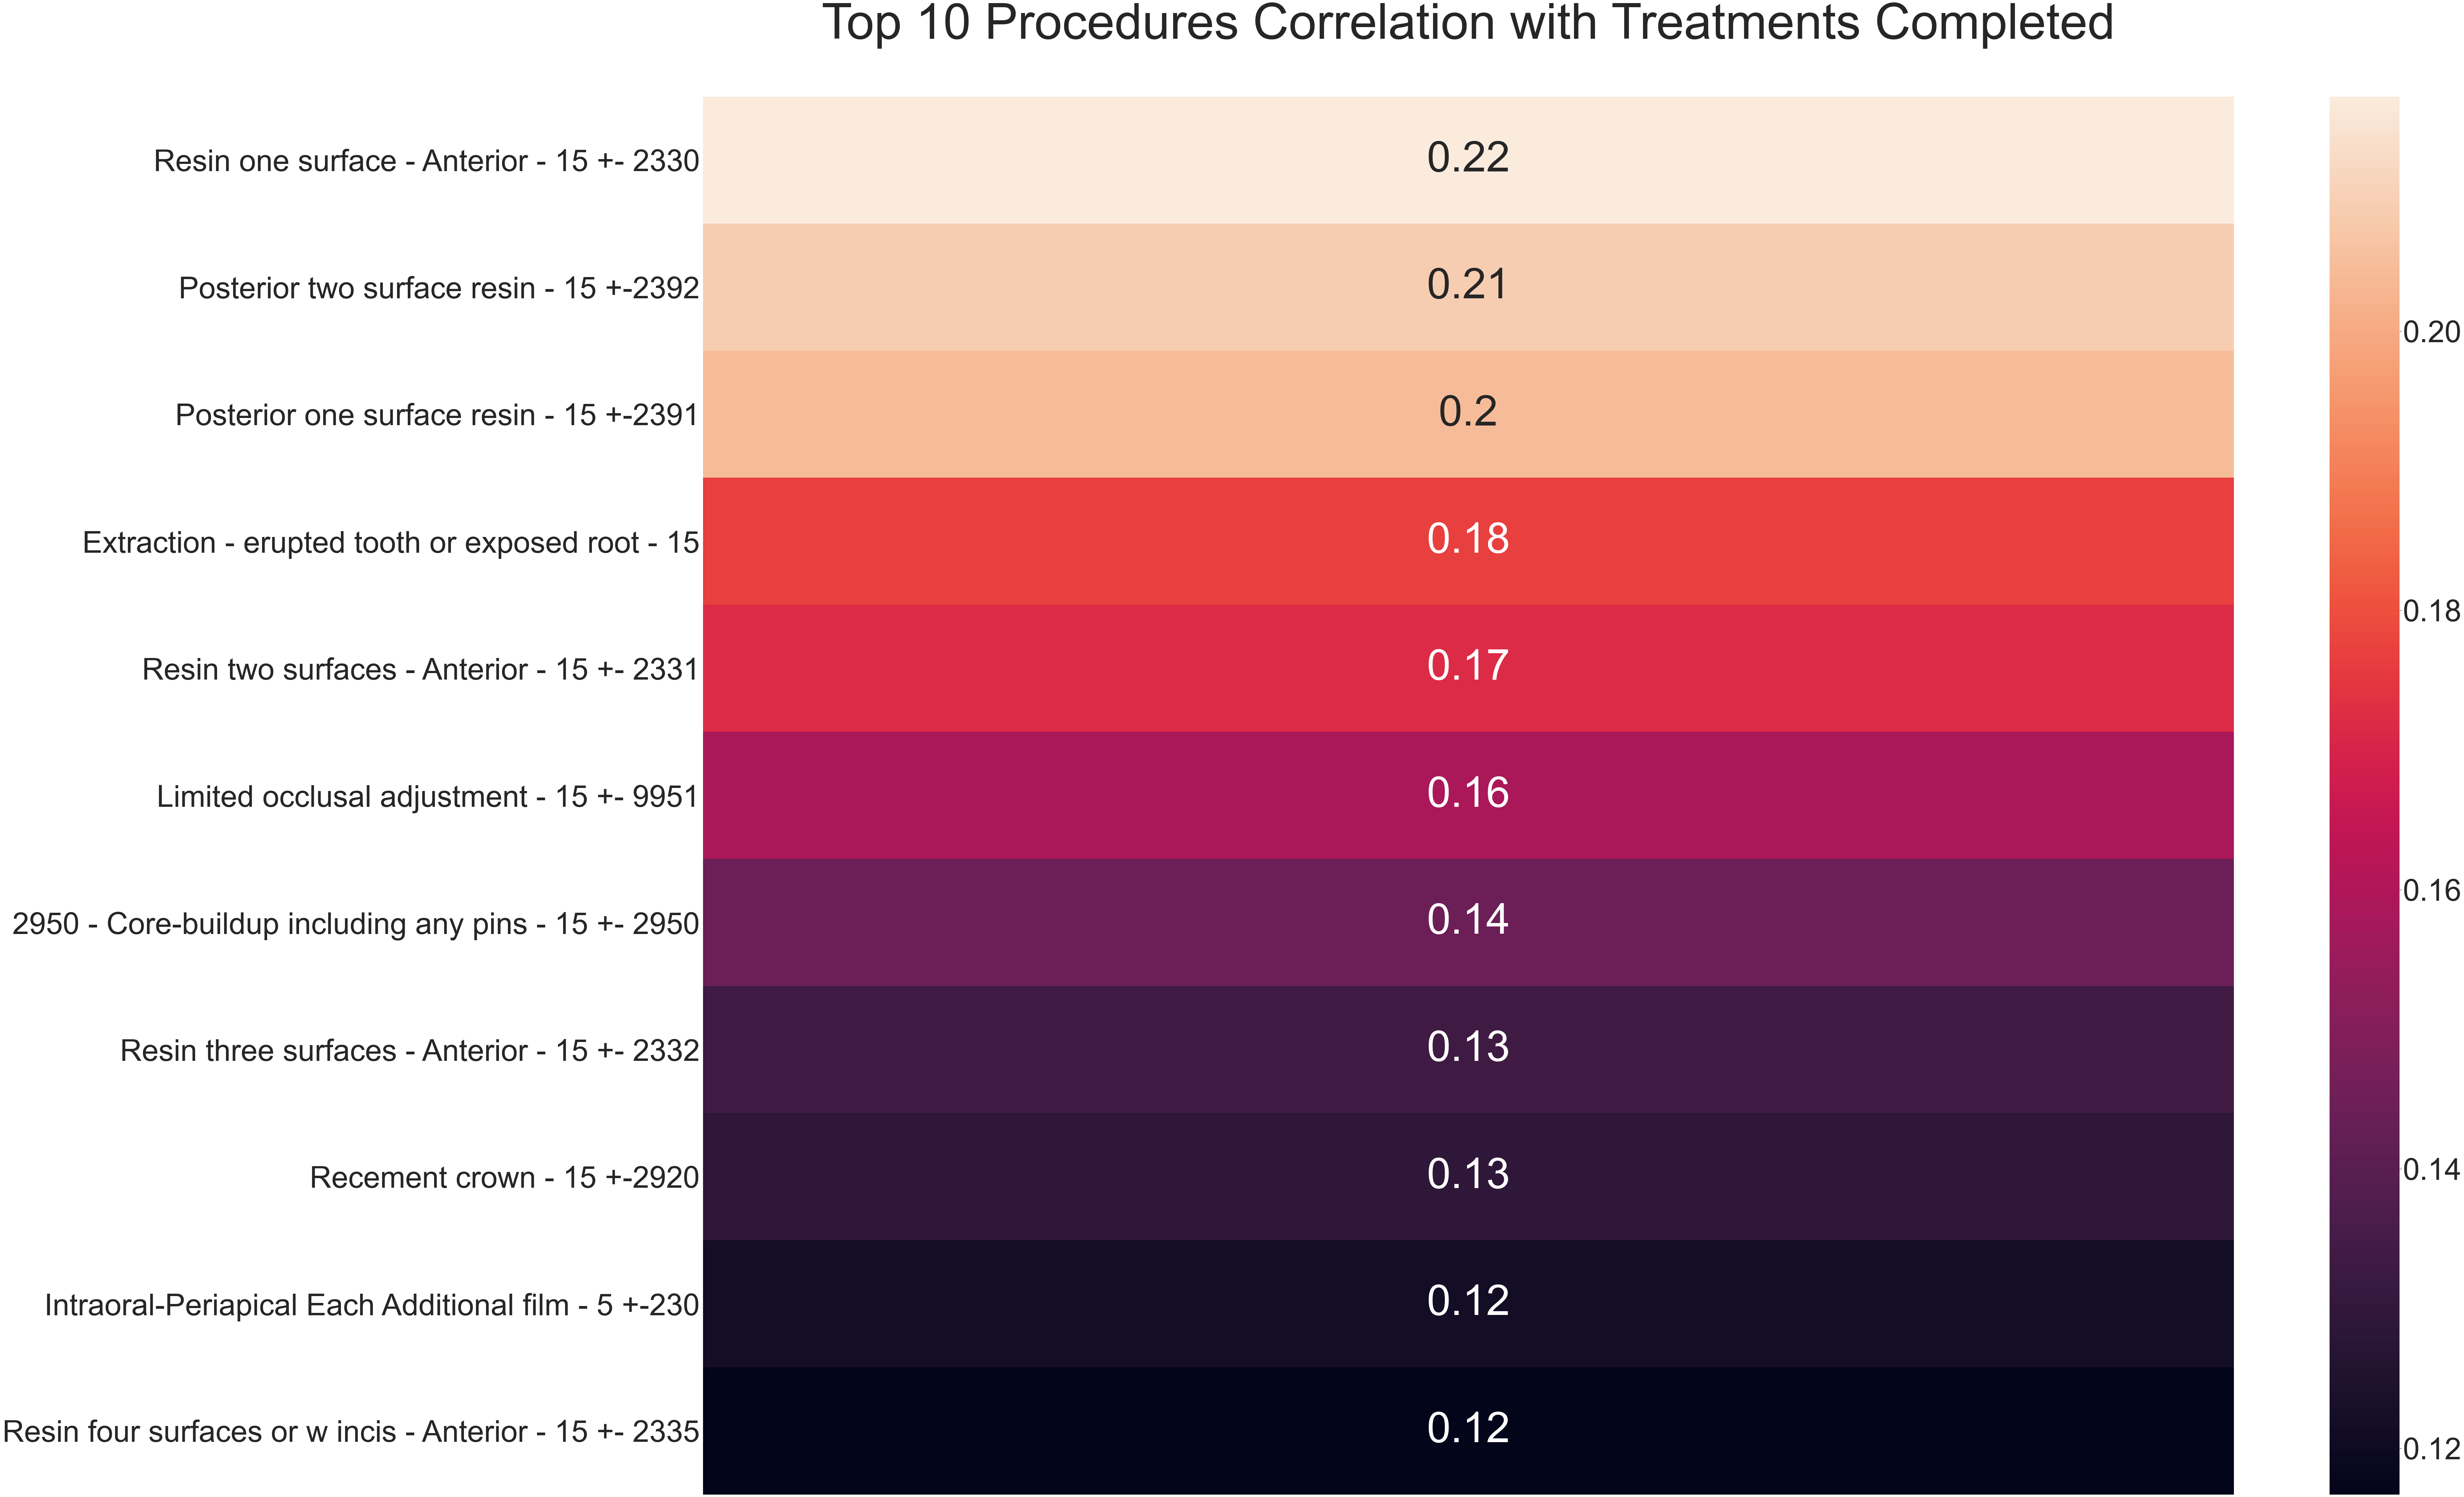

In [268]:
df_corr_treatment_plan = smile_grouped[smile_grouped.columns[0:70]].corr()['Treatment Plan - Is the treatment plan completed?_Yes'][:-2]
df_corr_treatment_plan = df_corr_treatment_plan.sort_values(ascending=False)
df_corr_treatment_plan_2 = df_corr_treatment_plan[0:11]

#set fig size
fig, ax = plt.subplots(figsize=(100,75))
ax.set_title('Top 10 Procedures Correlation with Treatments Completed', fontsize = 145, y = 1.04)
ax.get_xaxis().set_visible(False)
#plot matrix
sns.set(rc={"figure.figsize":(13, 8)},font_scale=8, style="whitegrid")
smileplus_palette = sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
sns.set_palette(smileplus_palette)
g = sns.heatmap(df_corr_treatment_plan_2.to_frame(),annot=True, annot_kws={'size':125})
plt.savefig('treatment_yes.png', bbox_inches="tight")

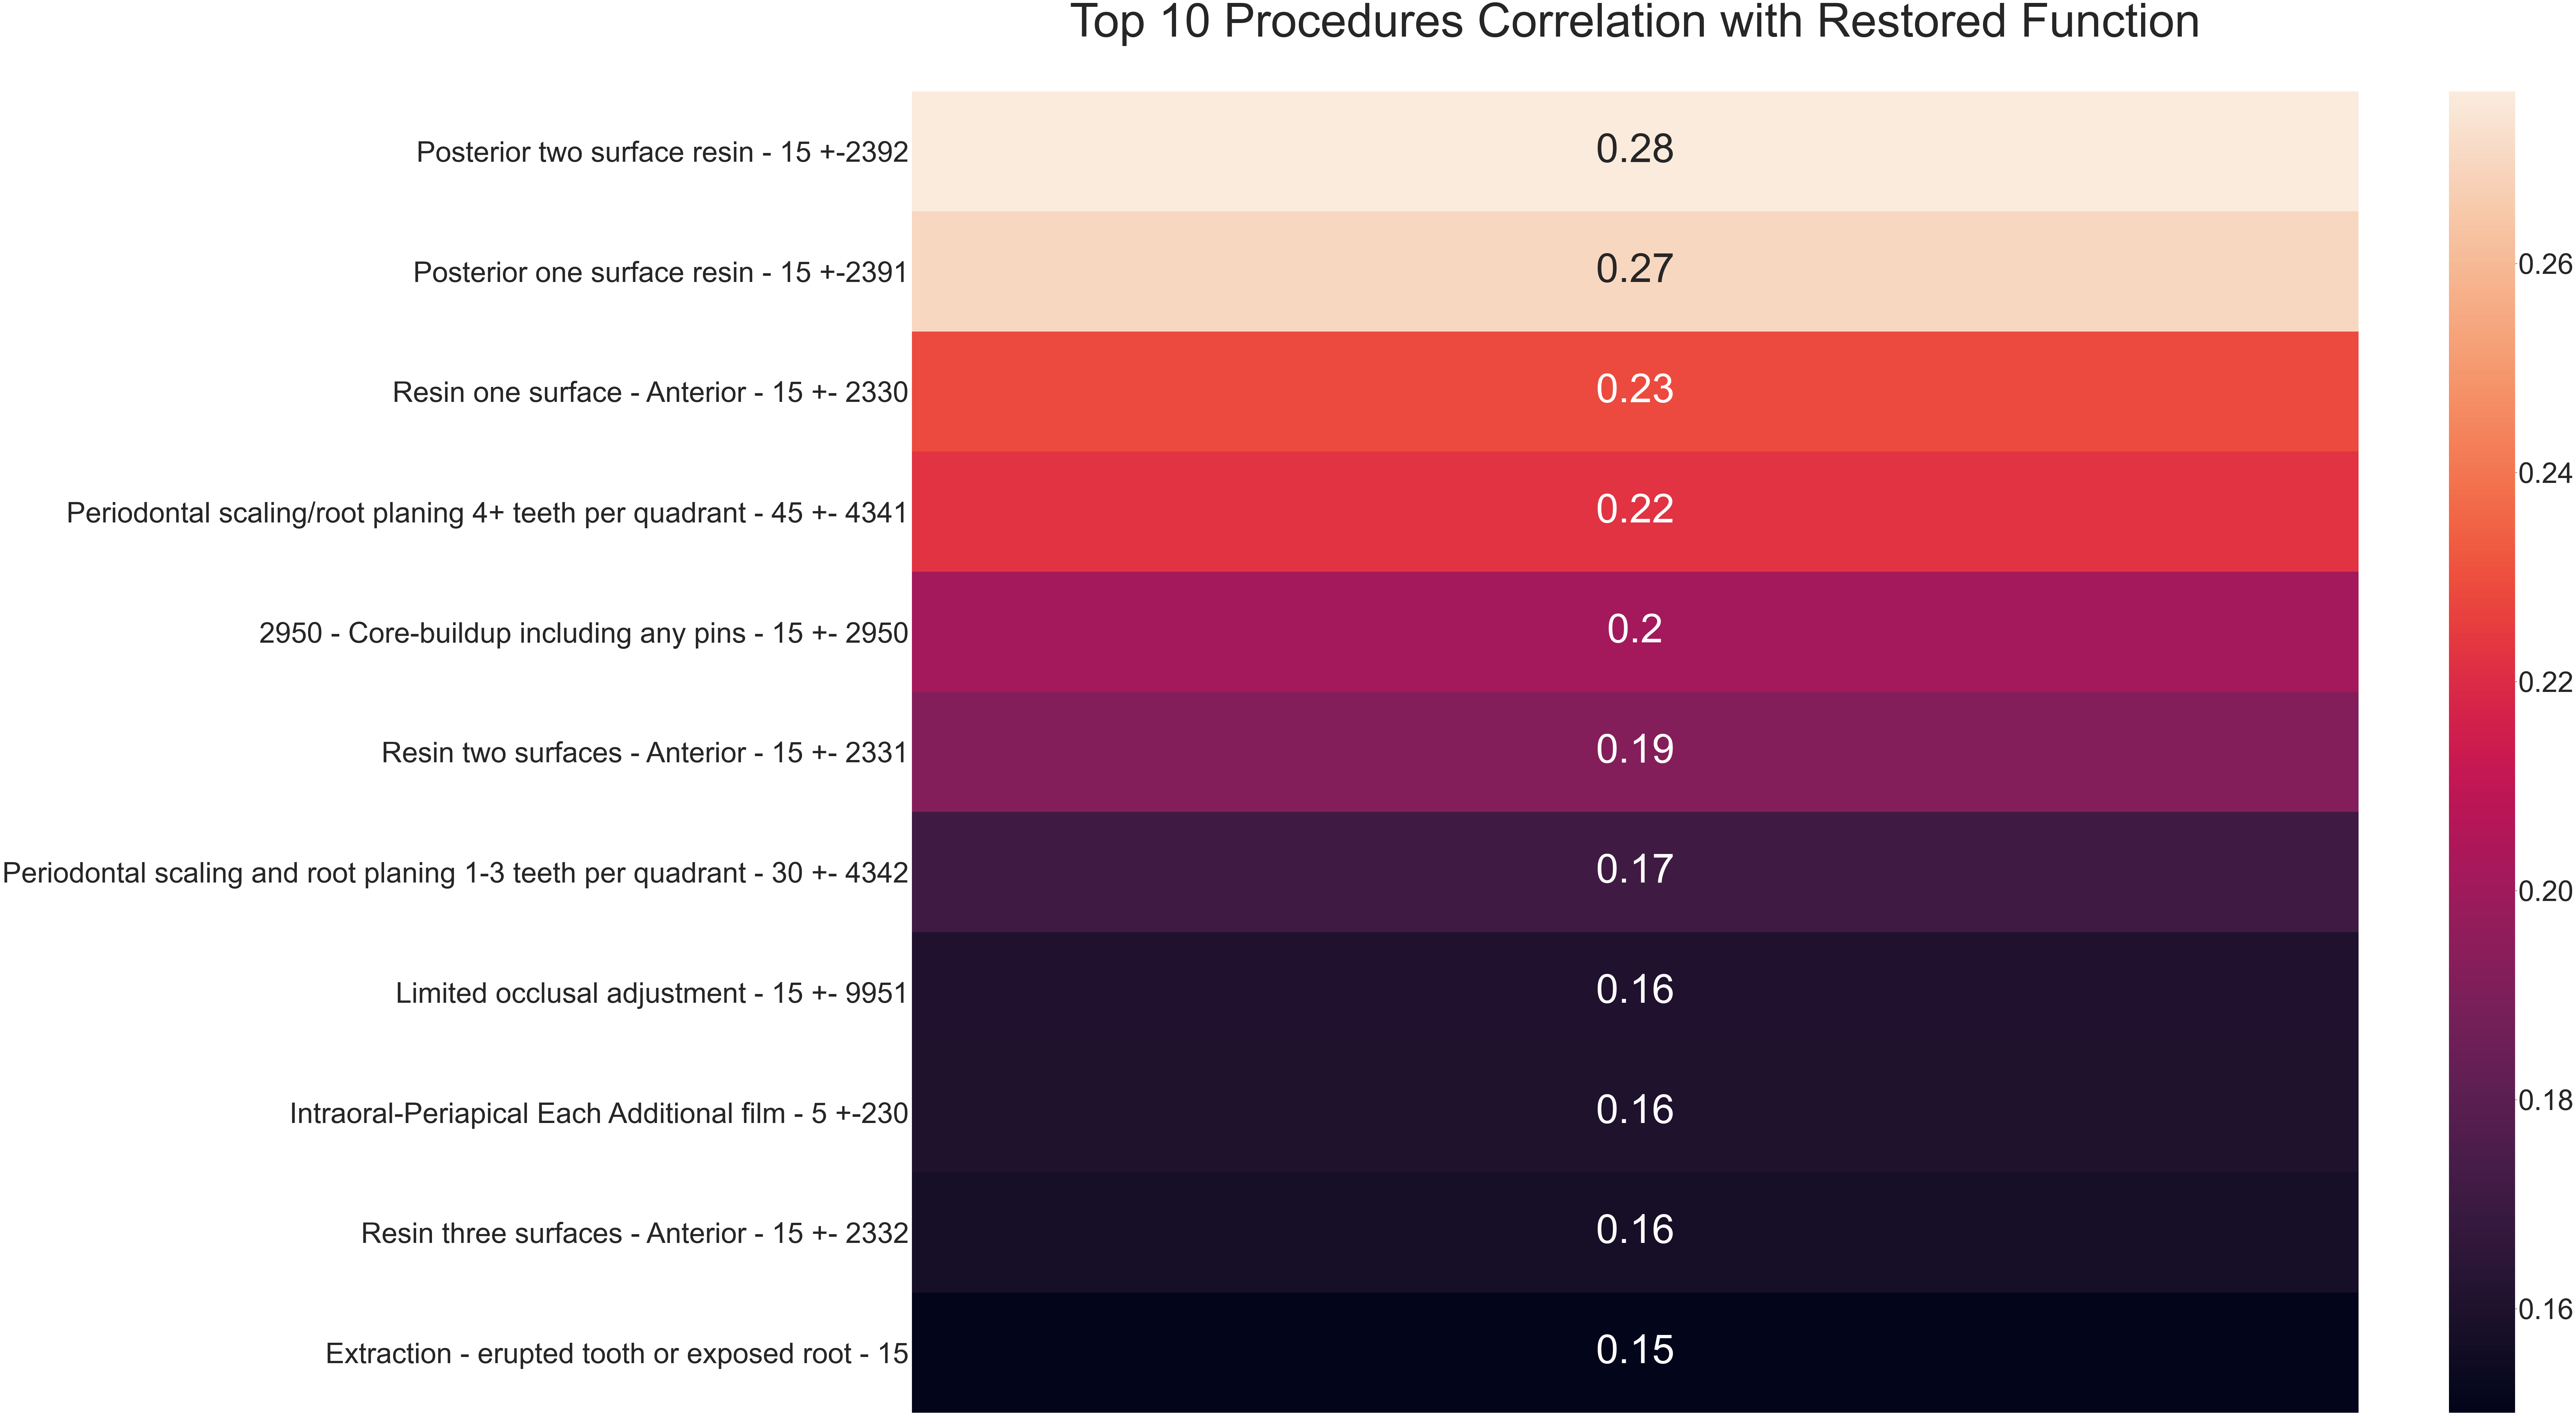

In [267]:
df_corr_function = smile_grouped[smile_grouped.columns[0:76]].corr()['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)_Yes'][:-4]
df_corr_function = df_corr_function.sort_values(ascending=False)
df_corr_function_2 = df_corr_function[2:13]

#set fig size
fig, ax = plt.subplots(figsize=(100,75))
ax.set_title('Top 10 Procedures Correlation with Restored Function', fontsize = 145, y = 1.04)
ax.get_xaxis().set_visible(False)
#plot matrix
sns.set(rc={"figure.figsize":(13, 8)},font_scale=8, style="whitegrid")

# Palette details
smileplus_palette = sns.color_palette(["#EE2737", "#507184", "#FBF9F9", "#18425A"])
sns.set_palette(smileplus_palette)
g = sns.heatmap(df_corr_function_2.to_frame(),annot=True, annot_kws={'size':125})
plt.savefig('function_yes.png', bbox_inches="tight")

In [210]:
pd.crosstab(smile_filter['Oral Care Encounter - 6930 - Quantity'], smile_filter['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)_Yes'])

"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_Yes",0,1
Oral Care Encounter - 6930 - Quantity,,
1.0,8,3
2.0,0,1


In [211]:
pd.crosstab(smile_filter['Oral Care Encounter - 2933 - Quantity'], smile_filter['Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)_Yes'])

"Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)_Yes",0,1
Oral Care Encounter - 2933 - Quantity,,
1.0,11,7
2.0,0,1


In [212]:
def cts(tabs, df):
    out=[]
    for col in smile_filter.loc[:,smile_filter.columns != tabs]:
        a = pd.crosstab([smile_filter[tabs]], smile_filter[col])
        out.append(a)
    return(out)
crosstabs = cts('Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)_Yes', smile_filter)

In [213]:
crosstabs

[Oral Care Encounter - 1351 - Quantity               1.0  2.0  4.0  6.0  8.0
 Treatment Plan - Was the enrollee able to be re...                         
 0                                                     5    1    0    0    1
 1                                                     2    1    1    1    0,
 Oral Care Encounter - 1354 - Quantity               1.0   2.0   3.0   4.0   \
 Treatment Plan - Was the enrollee able to be re...                           
 0                                                    207   126    80    54   
 1                                                    108    56    37    23   
 
 Oral Care Encounter - 1354 - Quantity               5.0   6.0   7.0   8.0   \
 Treatment Plan - Was the enrollee able to be re...                           
 0                                                     44    32    24    14   
 1                                                     16     5     7     3   
 
 Oral Care Encounter - 1354 - Quantity               9.